In [1]:
!sudo apt install fonts-noto-core fonts-noto-unhinted fonts-noto-color-emoji fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk fonts-noto-color-emoji fonts-noto-core fonts-noto-unhinted
0 upgraded, 4 newly installed, 0 to remove and 87 not upgraded.
Need to get 83.5 MB of archives.
After this operation, 148 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 fonts-noto-color-emoji all 2.047-0ubuntu0.22.04.1 [10.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto-unhinted all 20201225-1build1 [16.8 kB]
Fetched 83.5 MB in 6s (12.9 MB/s)                                              
debconf: unable to initialize frontend: Dialog
de

In [15]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import random
import wandb

In [4]:
font_path = os.path.join("/usr","share","fonts","truetype","noto","NotoSansTamil-Regular.ttf")
t_ = fm.FontProperties(fname=font_path)

In [11]:
NPZ_FILES = os.path.join("/kaggle/input/dl-a3-attention/attention_map/attention_map")

pred_attention_df = pd.read_csv("/kaggle/input/dl-a3-attention/attention_prediction.csv")
pred_attention_df = pred_attention_df.query("Correct == 1")
pred_attention_df.head()

,Sample_id,Input,Actual_Y,Prediction,Actual_Y_idx,Prediction_idx,Correct
5,5,hpaes,ஃபேஸ்\n,ஃபேஸ்\n,"[2, 24, 42, 34, 47, 1]","[2, 24, 42, 34, 47, 1]",1
12,12,agaththi,அகத்தி\n,அகத்தி\n,"[3, 14, 21, 47, 21, 37, 1]","[3, 14, 21, 47, 21, 37, 1]",1
13,13,akaththi,அகத்தி\n,அகத்தி\n,"[3, 14, 21, 47, 21, 37, 1]","[3, 14, 21, 47, 21, 37, 1]",1
18,18,ahamadabad,அகமதாபாத்\n,அகமதாபாத்\n,"[3, 14, 25, 21, 36, 24, 36, 21, 47, 1]","[3, 14, 25, 21, 36, 24, 36, 21, 47, 1]",1
22,22,akamatapat,அகமதாபாத்\n,அகமதாபாத்\n,"[3, 14, 25, 21, 36, 24, 36, 21, 47, 1]","[3, 14, 25, 21, 36, 24, 36, 21, 47, 1]",1


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 3018 (\N{TAMIL VOWEL SIGN O}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2996 (\N{TAMIL LETTER LLLA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


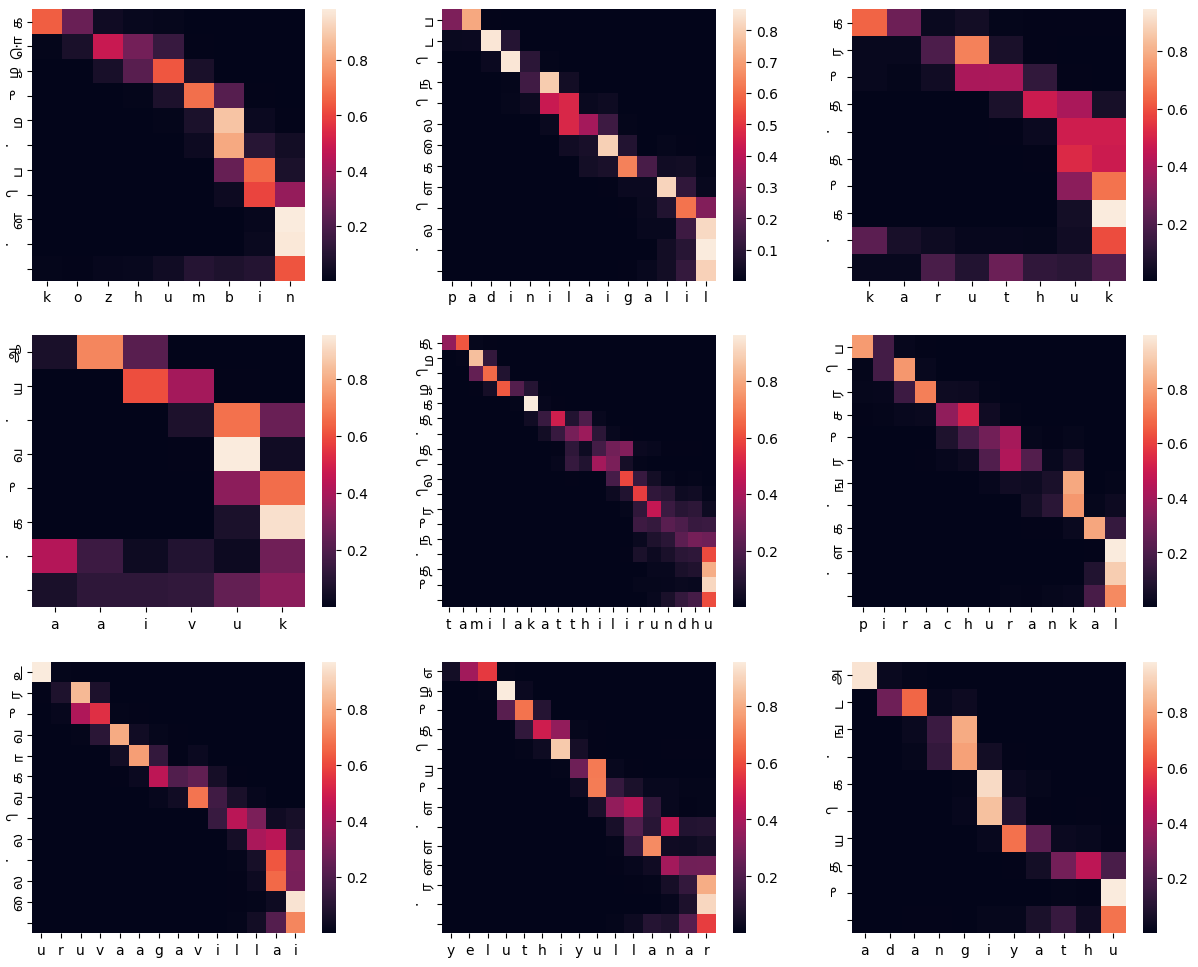

In [16]:
fig, axes = plt.subplots(3,3, figsize=(15,12))

for ax in axes.flat:
    sample_id = random.randint(0,len(pred_attention_df))
    row = pred_attention_df.iloc[sample_id]
    #print("Input size",len(row['Input']),"Output size",len(row['Prediction']))
    data = np.load(os.path.join(NPZ_FILES,f"{int(row['Sample_id'])}.npz"))["attention_map"]
    #print(data.shape)
    sns.heatmap(data,ax=ax, xticklabels=row['Input'],yticklabels=row['Prediction'])

    for label in ax.get_yticklabels():
        label.set_font_properties(t_)
        
from kaggle_secrets import UserSecretsClient
secret_label = "wandb_api_key"
wandb_key = UserSecretsClient().get_secret(secret_label)
wandb.login(key=wandb_key)

wandb.init(
    project="assignment_3",
    name="Attention_heatmap",
)
wandb.log({'attention_heatmap': wandb.Image(fig)})
wandb.finish()

In [ ]:
row = pred_attention_df.iloc[0]
print("Input size",len(row['Input']),"Output size",len(row['Prediction']))
data = np.load(os.path.join(NPZ_FILES,f"{int(row['Sample_id'])}.npz"))["attention_map"]
print(data.shape)
sns.heatmap(data, xticklabels=row['Input'],yticklabels=row['Prediction'])
